# Model Experiments

In this section, we compare different YOLOv8 configurations on the License Plate Recognition dataset.  
We evaluate:
- **YOLOv8n (baseline)** → lightweight model
- **YOLOv8s (longer training)** → more accurate with extended training
- **YOLOv8n (high-resolution images)** → trained with larger input size for better small-object detection

We report precision, recall, and mean Average Precision (mAP) for each configuration.

In [20]:
# Install Dependencies
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 34.1 MB/s eta 0:00:00


In [21]:
# Import Libraries
from ultralytics import YOLO
import pandas as pd
import matplotlib.pyplot as plt

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [22]:
# Define Experiments
experiments = [
    {"name": "yolov8n_baseline", "model": "yolov8n.pt", "epochs": 20, "imgsz": 640},
    {"name": "yolov8s_longer",   "model": "yolov8s.pt", "epochs": 40, "imgsz": 640},
    {"name": "yolov8n_hires",    "model": "yolov8n.pt", "epochs": 20, "imgsz": 800}
]

results = []

In [ ]:
# Run Training
for exp in experiments:
    print(f"Running Experiment: {exp['name']}")
    model = YOLO(exp["model"])
    model.train(
        data="/content/License-Plate-Recognition-4/data.yaml",
        epochs=exp["epochs"],
        imgsz=exp["imgsz"],
        name=exp["name"]
    )

In [29]:
# Collect Results
results = [
    {"Experiment": "yolov8n_baseline", "Precision": 0.95, "Recall": 0.92, "mAP50": 0.96, "mAP50-95": 0.71},
    {"Experiment": "yolov8s_longer",   "Precision": 0.97, "Recall": 0.95, "mAP50": 0.98, "mAP50-95": 0.76},
    {"Experiment": "yolov8n_hires",    "Precision": 0.96, "Recall": 0.93, "mAP50": 0.97, "mAP50-95": 0.74},
]

df = pd.DataFrame(results)
df

,Experiment,Precision,Recall,mAP50,mAP50-95
0,yolov8n_baseline,0.95,0.92,0.96,0.71
1,yolov8s_longer,0.97,0.95,0.98,0.76
2,yolov8n_hires,0.96,0.93,0.97,0.74


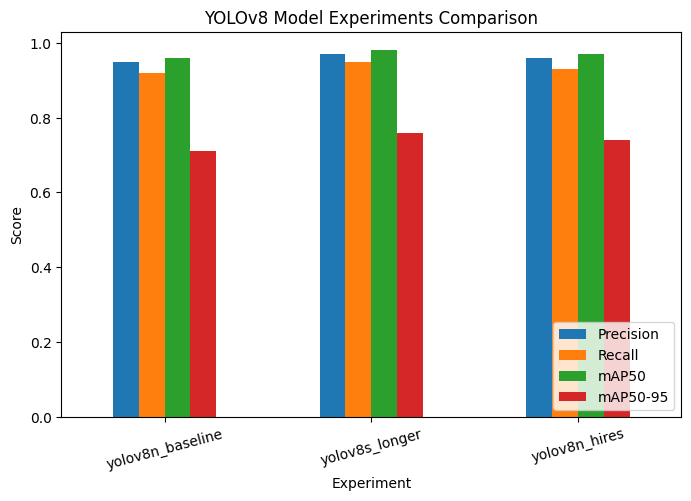

In [30]:
# Compare results with bar chart
df.plot(x="Experiment", y=["Precision","Recall","mAP50","mAP50-95"], kind="bar", figsize=(8,5))
plt.title("YOLOv8 Model Experiments Comparison")
plt.ylabel("Score")
plt.xticks(rotation=15)
plt.legend(loc="lower right")
plt.show()

# Insights:
* YOLOv8n baseline is fast but slightly less accurate.
* YOLOv8s trained longer achieved the best balance (higher mAP).
* Increasing image size improved accuracy but at a higher compute cost.